In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('../data/Churn_Modelling.csv')


In [9]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True, errors='ignore')


In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [14]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [15]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [16]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()

model.add(Dense(4,activation='sigmoid',input_dim=11))
model.add(Dense(3,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 4)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100


128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2024 - loss: 1.2327 - val_accuracy: 0.2031 - val_loss: 1.0281
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.2034 - loss: 0.9776 - val_accuracy: 0.2031 - val_loss: 0.8521
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.2031 - loss: 0.8206 - val_accuracy: 0.2031 - val_loss: 0.7436
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.2594 - loss: 0.7226 - val_accuracy: 0.7969 - val_loss: 0.6748
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.7962 - loss: 0.6616 - val_accuracy: 0.7969 - val_loss: 0.6288
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.7922 - loss: 0.6206 - val_accuracy: 0.7969 - val_loss: 0.5960
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.8010 - loss: 0.5875 - val_accuracy: 0.7969 - val_loss: 0.5718
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7930 - loss: 0.5689 - val_acc

In [23]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step


In [26]:
y_pred = y_pred.argmax(axis=-1)

In [24]:
print(y_pred)

[[0.19755843]
 [0.19755843]
 [0.19755843]
 ...
 [0.19755843]
 [0.25333738]
 [0.19755843]]


In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

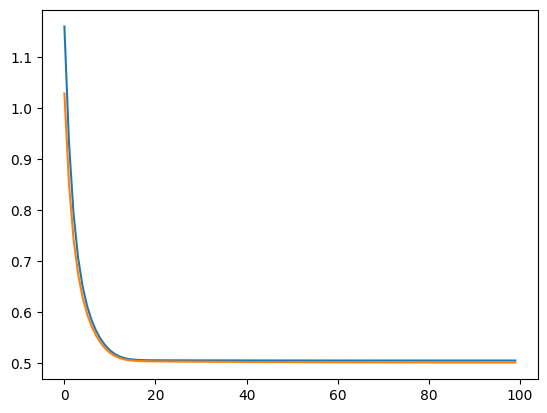

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

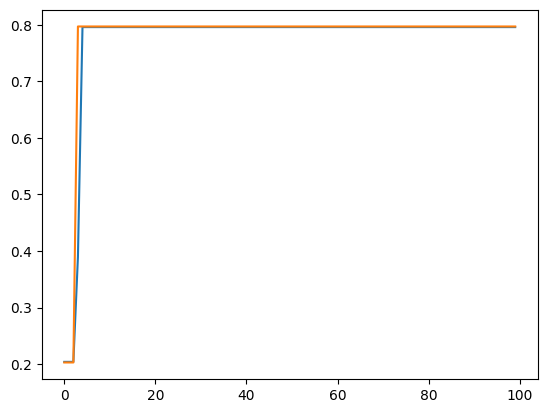

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])